Data retrieved as of Oct,2015)

Following the example from chapter 09 in the textbook *Python for Data Anlysis*, I analyzed the 2016 presidential campain finance data (http://www.fec.gov/disclosurep/PDownload.do). This batch of presidential campain is worth watching, if not the most, all because of this guy ![](https://dl.dropboxusercontent.com/u/18094167/BlogImages/%E5%B7%9D%E6%99%AE.jpg). Unfortunately, there is no data for Donald Trump. Anyway, he made  lots lots of money' and he will make America rich again. 

**Basic Stepup**

In [34]:
from __future__ import division
import numpy as np
import os
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [35]:
%matplotlib inline

In [36]:
fec = pd.read_csv('ch09/P00000001-ALL2015.csv',dtype={'contbr_st':object})

**Data Information**

As of the post was written, the data size was still quite small (21.5MB) comparing to that of 2012 full data. 

In [37]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127588 entries, 0 to 127587
Data columns (total 18 columns):
cmte_id              127588 non-null object
cand_id              127588 non-null object
cand_nm              127588 non-null object
contbr_nm            127588 non-null object
contbr_city          127571 non-null object
contbr_st            127588 non-null object
contbr_zip           127567 non-null object
contbr_employer      119521 non-null object
contbr_occupation    126148 non-null object
contb_receipt_amt    127588 non-null float64
contb_receipt_dt     127588 non-null object
receipt_desc         4904 non-null object
memo_cd              5444 non-null object
memo_text            20933 non-null object
form_tp              127588 non-null object
file_num             127588 non-null int64
tran_id              127588 non-null object
election_tp          127565 non-null object
dtypes: float64(1), int64(1), object(16)

In [41]:
# Filter out the candidates from both parties 
# And match the name to his/her affiliated party
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Rubio, Marco', 'Santorum, Richard J.', 'Perry, James R. (Rick)',
       'Carson, Benjamin S.', "Cruz, Rafael Edward 'Ted'", 'Paul, Rand',
       'Clinton, Hillary Rodham', 'Sanders, Bernard', 'Fiorina, Carly',
       'Huckabee, Mike', 'Pataki, George E.', "O'Malley, Martin Joseph",
       'Graham, Lindsey O.', 'Bush, Jeb', 'Jindal, Bobby'], dtype=object)

In [42]:
parties = {'Rubio, Marco': 'Republican',
           'Santorum, Richard J.': 'Republican',
           'Perry, James R. (Rick)': 'Republican',
           'Carson, Benjamin S.': 'Republican',
           "Cruz, Rafael Edward 'Ted'": 'Republican',
           'Paul, Rand': 'Republican',
           'Clinton, Hillary Rodham': 'Democrat',
           'Sanders, Bernard':'Democrat',
           "O'Malley, Martin Joseph":'Democrat',
           'Fiorina, Carly': 'Republican',
           'Huckabee, Mike': 'Republican',
           'Pataki, George E.': 'Republican',
           'Graham, Lindsey O.': 'Republican',
           'Bush, Jeb': 'Republican',
           'Jindal, Bobby': 'Republican'}

In [43]:
fec['party'] = fec.cand_nm.map(parties)

**Donation Stats by Occupation**

In [46]:
#simplify the dataset by choosing only positive contributions , 'refund' means negative contribution
fec_ctr = fec[fec.contb_receipt_amt > 0]  
key_nm = ['Clinton, Hillary Rodham','Sanders, Bernard', 'Carson, Benjamin S.','Fiorina, Carly']
fec_mrbo = fec_ctr[fec_ctr.cand_nm.isin(key_nm)]

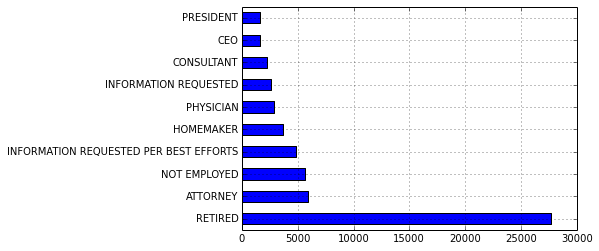

In [47]:
# overall main contributors and their occupations (by number of people/votes)
all_main_contri = fec_ctr.contbr_occupation.value_counts()[:10]
all_main_contri.plot(kind='barh')

**Donation Stats by Occupation for Each Party**

In [48]:
# change the missing information about the occupation to 'NOT PROVIDED'

occ_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 'INFORMATION REQUESTED' : 'NOT PROVIDED',
'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED', 'C.E.O.': 'CEO'
}
f = lambda x: occ_mapping.get(x, x)
fec_ctr.contbr_occupation = fec_ctr.contbr_occupation.map(f)

In [49]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.ctr_employer = fec.contbr_employer.map(f)

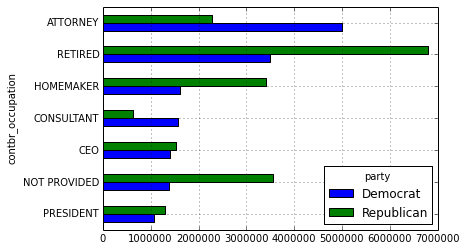

In [50]:
by_occupation = fec_ctr.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000].sort_index(by='Democrat')

over_2mm.plot(kind='barh')

**Donation Amount Range**

Four main candidates from both parties are examined. 


In [51]:
# get the top amounts of contribution based on occupation 
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
# Order totals by key in descending order 
    return totals.order(ascending=False)[-n:]

grouped = fec_mrbo.groupby('cand_nm')
fecss= grouped.apply(get_top_amounts, 'contbr_occupation', n=5)

In [53]:
## dividing the donation amounts 

bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
grouped = fec_mrbo.groupby(['cand_nm', labels])
bucket_sum = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sum

cand_nm,"Carson, Benjamin S.","Clinton, Hillary Rodham","Fiorina, Carly","Sanders, Bernard"
contb_receipt_amt,,,,
"(0, 1]",NaN,62.88,NaN,5.00
"(1, 10]",2757.77,18585.59,80.00,11071.15
"(10, 100]",711796.75,688244.35,39763.00,572478.82
"(100, 1000]",1991423.34,5327889.18,348287.99,2225209.10
"(1000, 10000]",900182.00,32514178.72,613597.78,461169.96
"(10000, 100000]",21600.00,20000.00,NaN,NaN


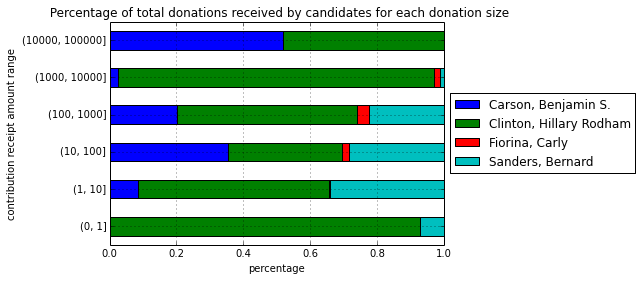

In [20]:
normed_sums = bucket_sum.div(bucket_sum.sum(axis=1), axis=0)
ax=normed_sums.plot(kind='barh', stacked=True)

# set the legend outside the charts.
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_ylabel('contribution receipt amount range')
ax.set_xlabel('percentage')
ax.set_title(' Percentage of total donations received by candidates for each donation size')


**Donation Stats by States**

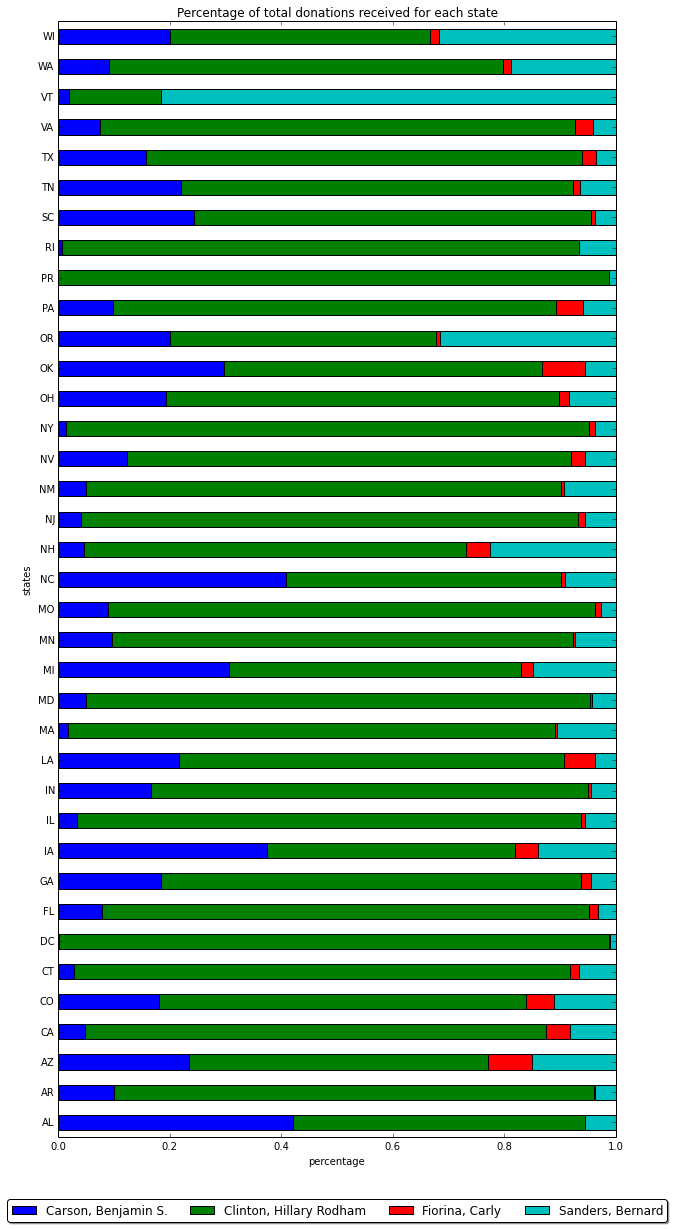

In [21]:
## Donation by states

grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
percent = totals.div(totals.sum(1), axis=0)


ax = percent.plot(kind='barh', stacked=True,figsize=(10,20),grid= False,title= 'Percentage of total donations received for each state')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
ax.set_xlim ([0,1]) 
ax.set_ylabel('states')
ax.set_xlabel('percentage')


**Plot on Map**

Here some packages have changed since the textbook was pubished, I am still figuring out how to transfer above graph to the U.S map.  

In [22]:
## plot the percentage on the US map 
from mpl_toolkits.basemap import Basemap, cm 
import numpy as np
from matplotlib import rcParams
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
import shapefile
import dbf 

In [24]:
state_to_code = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

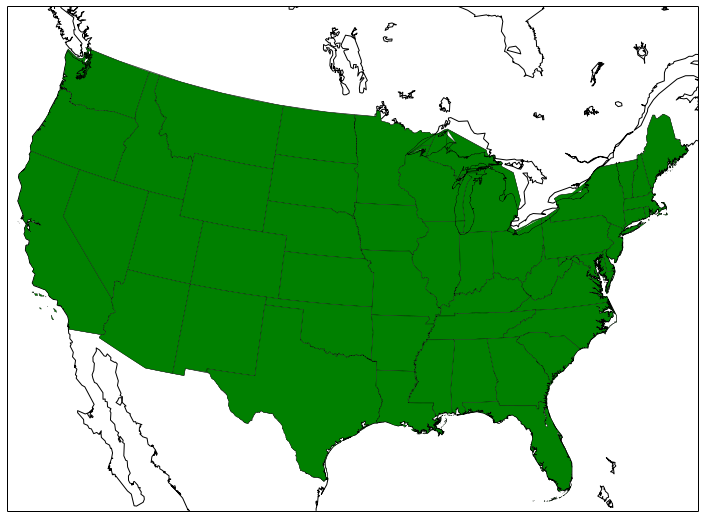

In [25]:
Hillary = percent['Clinton, Hillary Rodham']
Fiorina = percent['Fiorina, Carly']

fig = plt.figure(figsize=(12, 12)) 
ax = fig.add_axes([0.1,0.1,0.8,0.8])
lllat = 21; urlat = 53; lllon = -118; urlon = -62

m = Basemap(ax=ax, projection='stere',
            lon_0=(urlon + lllon) / 2, lat_0=(urlat + lllat) / 2, 
            llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, 
            urcrnrlon=urlon, resolution='l')
m.drawcoastlines() 
m.drawcountries()

myshp = open('ch09/statesp020.shp') 
mydbf = open("ch09/statesp020.dbf")
r = shapefile.Reader(shp=myshp, dbf=mydbf)
shapes = r.shapes()
records = r.records()

for shape in shapes:

# Draw colored polygons on the map 
    shpsegs = []
    
    lons, lats = zip(*shape.points) 
    x, y = m(lons, lats) 
    shpsegs.append(zip(x,y))
        
    if len(shape.parts) == 0: 
        name = r.fields[4]        
    lines = LineCollection(shpsegs,antialiaseds=(1,))

    
    try:
        per = Hillary[state_to_code]
    except KeyError: 
        continue
        
    lines.set_facecolors('g')
    lines.set_edgecolors('k')
    lines.set_linewidth(0.3)
    ax.add_collection(lines)
plt.show()

